In [1]:
# importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
# read the dataset 
df = pd.read_csv('freelance_platform_project.csv')
# display first 5 rows/data
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


# Perform necessary EDA on the data

In [2]:
# check missing values
df.isna().sum()

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [3]:
# check number of rows and columns present
df.shape

(12222, 17)

In [4]:
# Remove or delete rows which are not required for prediction
df.drop(columns=['Duration','Client Job Title','Date Posted','Client Registration Date'], axis=1,inplace=True)
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Description', 'Client City', 'Client Country', 'Client Currency'],
      dtype='object')

In [5]:
df.dtypes

Title                         object
Category Name                 object
Experience                    object
Sub Category Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Description                   object
Client City                   object
Client Country                object
Client Currency               object
dtype: object

## categorical data encoding

In [6]:
# Select all the object columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Location', 'Freelancer Preferred From', 'Type', 'Description',
       'Client City', 'Client Country', 'Client Currency'],
      dtype='object')

In [7]:
# Encoding object columns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in obj_cols:
    df[i]=encoder.fit_transform(df[i])
    
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int32
Sub Category Name              int32
Currency                       int32
Budget                       float64
Location                       int32
Freelancer Preferred From      int32
Type                           int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency                int32
dtype: object

In [8]:
df['Budget'].isna().sum()

0

## Finding and handling outliers

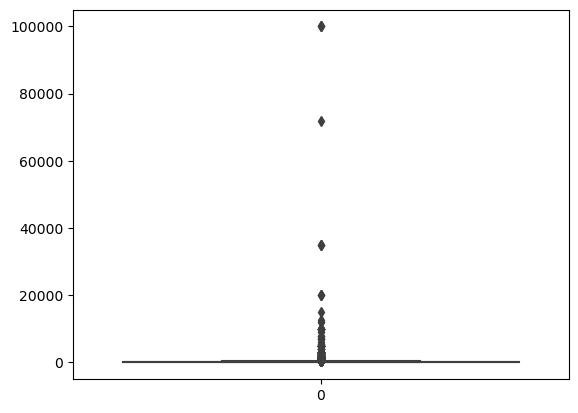

In [9]:
# Check for outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Budget'])
plt.show()

## Handling Skewness

In [10]:
# Check for skewness if any
from scipy.stats import skew

print(skew(df['Budget']))

42.45018768791635


In [11]:
# Reduce skewness using Box-cox transformation
from scipy.stats import boxcox

# Add a small constant to handle zero values in the column
df['Budget'] = df['Budget'] + 1e-3

# Apply Box-Cox transformation
df['Budget'] = boxcox(df['Budget'])[0]

# Check skewness
df['Budget'].skew()

0.08963714178695215

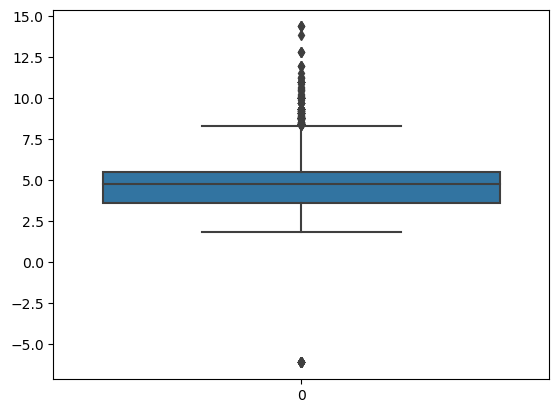

In [12]:
# Checking if there are any outliers present
sns.boxplot(df['Budget'])
plt.show()

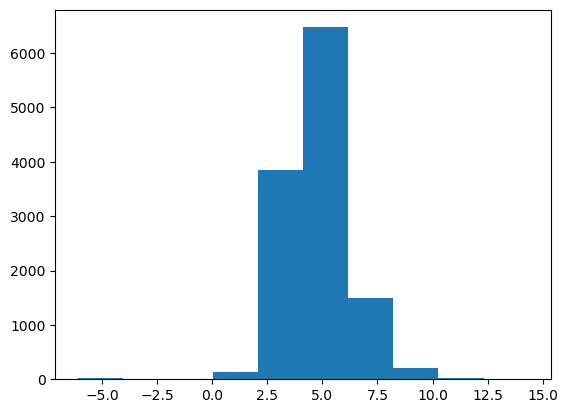

In [13]:
plt.hist(df['Budget'])
plt.show()

## Using IQR replacing outliers with upper/lower fence
1. sort the data
2. calculate Q1(25%) and Q3(75%)
3. IQR=Q3-Q1
4. Find lower fence (Q1-1.5(IQR))
5. Find upper fence (Q3+1.5(IQR))

In [14]:
data=df['Budget']
# sort the data
data = sorted(data)

In [15]:
# finding Q1(25%) and Q3(75%)
q1, q3 = np.percentile(data,[25,75])
print(q1,q3)

3.624869809500638 5.506003840516138


In [16]:
# calculate IQR, upper boundary and lower boundary
iqr = q3-q1
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)

In [17]:
# Replacing values which are present outside the lower boundary with lower boundary value
# and values present outside the upper boundary with upper boundary value
for i in df.index:
    if (df.loc[i,'Budget']>upper_fence):
        df.loc[i,'Budget']=upper_fence
    elif (df.loc[i,'Budget']<lower_fence):
        df.loc[i,'Budget']=lower_fence

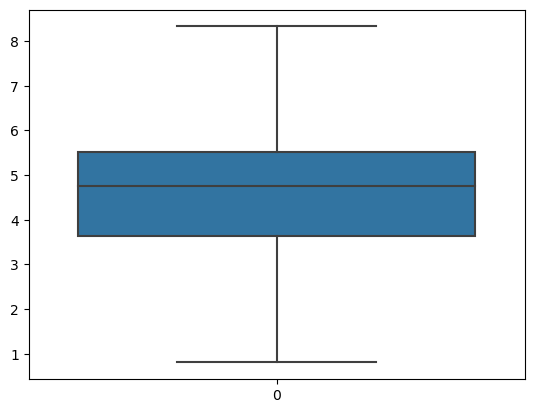

In [18]:
# Checking if there still any outliers present
sns.boxplot(df['Budget'])
plt.show()

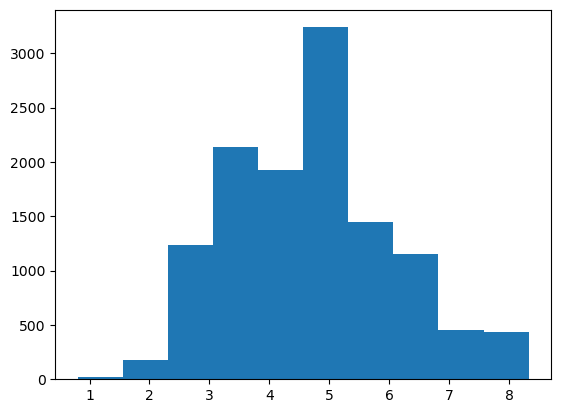

In [19]:
plt.hist(df['Budget'])
plt.show()

In [20]:
# Check for normal distribution by calculating mean, median and mode. 
# If mean, median and mode are almost same then distribution could be symmetric, and possibly normal
df['Budget'].mean()

4.694033454731113

In [21]:
df['Budget'].median()

4.757891484639088

In [22]:
df['Budget'].mode()

0    5.021463
Name: Budget, dtype: float64

## Scaling

In [23]:
# Scaling all the columns by MinMaxScaler 
# for each column in dataframe, it scales the values in that column to be between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()
for col in df:
    df[col] = mx.fit_transform(df[[col]])

In [24]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Description,Client City,Client Country,Client Currency
0,0.083650,0.125,0.0,0.396226,0.0,0.480843,0.5,0.02439,0.0,0.875042,0.270614,0.451852,0.0
1,0.550501,0.875,0.0,0.424528,0.5,0.314335,0.5,0.02439,0.0,0.104579,0.520199,0.955556,0.5
2,0.095649,0.000,0.0,0.349057,0.5,0.239195,0.5,0.02439,0.0,0.182741,0.520199,0.955556,0.5
3,0.040314,0.000,0.0,0.849057,0.5,0.261720,0.5,0.02439,0.0,0.182908,0.520199,0.955556,0.5
4,0.333132,0.250,0.5,0.716981,1.0,1.000000,0.5,0.02439,0.0,0.253606,0.597122,0.429630,1.0


In [25]:
df['Budget'].mean()

0.5170903066451495

In [26]:
df['Budget'].median()

0.5255769467323397

 # Create a regression model to predict the budget

In [27]:
# x= all the columns in df except Budget(indepent variables)
# y= budget column(dependent variables/target)
x = df.drop(columns=['Budget'])
y = df['Budget']

In [28]:
# Split whole dataset into train and test data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8, random_state = 4)
# train_size parameter is set to 0.8, i.e., 80% of the data will be used for training the model, 
# and the remaining 20% will be used for testing
# random_state value ensures we’ll get the same split in future.

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0.68646062, 0.49649786, 0.50711877, 0.43805084, 0.69312907])

In [30]:
testpred = model.predict(xtest)
testpred[:5]

array([0.46115279, 0.57622865, 0.35988444, 0.29627396, 0.56626993])

In [31]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(ytrain,trainpred)
mse_train

0.021686143303817323

In [32]:
mse_test = mean_squared_error(ytest,testpred)
mse_test

0.021936815597932896

## Polynomial Regression

In [33]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Description,Client City,Client Country,Client Currency
0,0.083650,0.125,0.0,0.396226,0.0,0.480843,0.5,0.02439,0.0,0.875042,0.270614,0.451852,0.0
1,0.550501,0.875,0.0,0.424528,0.5,0.314335,0.5,0.02439,0.0,0.104579,0.520199,0.955556,0.5
2,0.095649,0.000,0.0,0.349057,0.5,0.239195,0.5,0.02439,0.0,0.182741,0.520199,0.955556,0.5
3,0.040314,0.000,0.0,0.849057,0.5,0.261720,0.5,0.02439,0.0,0.182908,0.520199,0.955556,0.5
4,0.333132,0.250,0.5,0.716981,1.0,1.000000,0.5,0.02439,0.0,0.253606,0.597122,0.429630,1.0


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
x_poly

array([[1.        , 0.08364986, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.55050069, 0.875     , ..., 0.2282716 , 0.11944444,
        0.0625    ],
       [1.        , 0.09564917, 0.        , ..., 0.2282716 , 0.11944444,
        0.0625    ],
       ...,
       [1.        , 0.77063191, 0.75      , ..., 0.2282716 , 0.11944444,
        0.0625    ],
       [1.        , 0.17757251, 0.125     , ..., 0.18458162, 0.42962963,
        1.        ],
       [1.        , 0.12146064, 0.        , ..., 0.2282716 , 0.11944444,
        0.0625    ]])

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly,y)
pred = model.predict(x_poly)
pred

array([0.38926196, 0.39104557, 0.45328355, ..., 0.43324709, 0.43738198,
       0.63080764])

In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,pred)

0.011333285385149492

## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1) 
lasso.fit(xtrain,ytrain)
lasso.coef_

array([-0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.])

In [38]:
from sklearn.metrics import mean_absolute_error

trainpred = lasso.predict(xtrain)
mean_absolute_error(ytrain, trainpred)

0.14613168065072926

In [39]:
from sklearn.metrics import mean_absolute_error

testpred = lasso.predict(xtest)
mean_absolute_error(ytest, testpred)

0.14701928502899633

In [40]:
trainerrors = []
testerrors = []
for i in range(10):
    lasso = Lasso(alpha=i)
    lasso.fit(xtrain, ytrain)
    trainpred = lasso.predict(xtrain)
    trainerrors.append(mean_absolute_error(ytrain, trainpred))
    testpred = lasso.predict(xtest)
    testerrors.append(mean_absolute_error(ytest,testpred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+02, tolerance: 3.337e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

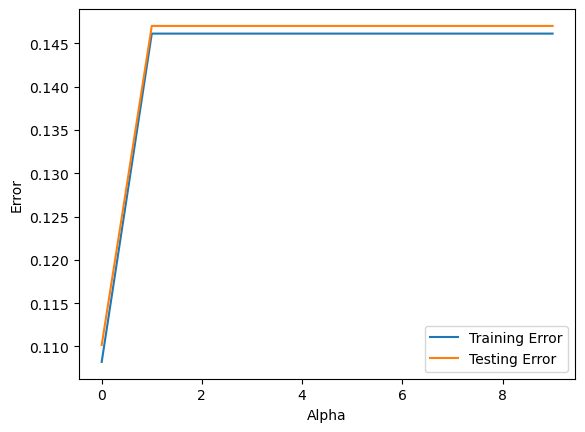

In [41]:
import matplotlib.pyplot as plt

plt.plot(range(10), trainerrors, label='Training Error')
plt.plot(range(10), testerrors, label='Testing Error')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
plt.show()

## Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1) 
ridge.fit(xtrain,ytrain)
ridge.coef_

array([-0.00718485,  0.03502816,  0.22510444,  0.04795992,  0.01552964,
        0.03557608,  0.00227745, -0.22232637,  0.00949899,  0.00940394,
       -0.00206316,  0.02362113])

In [43]:
trainpred = ridge.predict(xtrain)
mean_absolute_error(ytrain,trainpred)

0.10821101566756007

In [44]:
testpred = ridge.predict(xtest)
mean_absolute_error(ytest, testpred)

0.11016590967741031

In [45]:
trainerrors = []
testerrors = []
for i in range(10):
    ridge = Ridge(alpha=i)
    ridge.fit(xtrain, ytrain)
    trainpred = ridge.predict(xtrain)
    trainerrors.append(mean_absolute_error(ytrain, trainpred))
    testpred = ridge.predict(xtest)
    testerrors.append(mean_absolute_error(ytest,testpred))

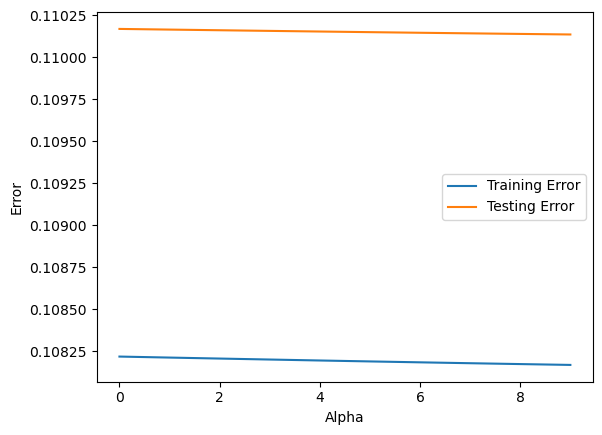

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(10), trainerrors, label='Training Error')
plt.plot(range(10), testerrors, label='Testing Error')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
plt.show()

## Decision Tree Regression 

In [47]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0.64966256, 0.42044309, 0.42044309, 0.42044309, 0.64966256])

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain, trainpred)

0.016679188651920966

In [49]:
testpred = model.predict(xtest)
mean_squared_error(ytest, testpred)

0.016800662109437328

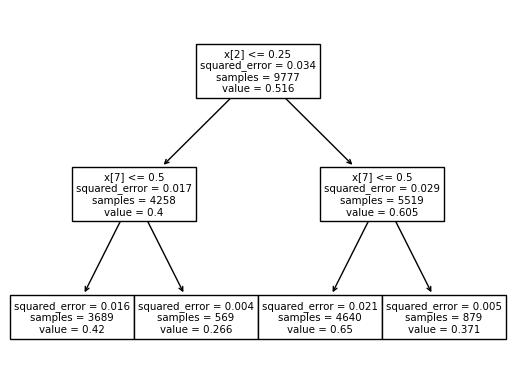

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model)
plt.show()

## Random Forest Regression

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)
model.fit(xtrain,ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0.53991798, 0.41570787, 0.49136173, 0.42112375, 0.49369856])

In [52]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain, trainpred)

0.0016301068758172016

In [53]:
testpred = model.predict(xtest)
mean_squared_error(ytest, testpred)

0.012216717113157121

## Adaboost Regression

In [54]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(xtrain,ytrain)
trainpred=model.predict(xtrain)
trainpred[:5]

array([0.47475237, 0.43759899, 0.43560734, 0.40142376, 0.48236141])

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain,trainpred)

0.016177633211307017

In [56]:
testpred = model.predict(xtest)
mean_squared_error(ytest,testpred)

0.016802053393387487

## Gradient Boost Regression

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0.56201587, 0.46763942, 0.44520272, 0.39028876, 0.51358022])

In [58]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain,trainpred)

0.011446780734828799

In [59]:
testpred = model.predict(xtest)
mean_squared_error(ytest,testpred)

0.012473576883466873

## XGBoost Regression

In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(xtrain,ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0.5465826 , 0.44730353, 0.49883124, 0.4204643 , 0.5059216 ],
      dtype=float32)

In [62]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain,trainpred)

0.0050838922466072715

In [63]:
testpred = model.predict(xtest)
testpred[:5]

array([0.42261744, 0.5952814 , 0.37062526, 0.26594287, 0.65999776],
      dtype=float32)

In [64]:
mean_squared_error(ytest,testpred)

0.012431742823101924

## Support Vector Regression

In [65]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0.67625683, 0.5062645 , 0.50896566, 0.4316868 , 0.68892257])

In [66]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain, trainpred)

0.021737536108822227

In [67]:
testpred = model.predict(xtest)
mean_squared_error(ytest, testpred)

0.022052900414065605

# 4. Create a classification model to predict the value of the Type column.

In [68]:
x = df.drop(columns=['Type'])
y = df['Type']

In [69]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8,
                                               random_state=4,
                                               stratify = y) 

## Logistic Regression

In [70]:
y.value_counts()

0.0    10437
1.0     1785
Name: Type, dtype: int64

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced') # gives equal weight to both the points
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([1., 0., 0., 0., 0.])

In [72]:
testpred = model.predict(xtest)
testpred[:5]

array([0., 0., 1., 0., 0.])

In [73]:
from sklearn import metrics

cm = metrics.confusion_matrix(ytrain, trainpred)
cm

array([[6809, 1540],
       [ 109, 1319]], dtype=int64)

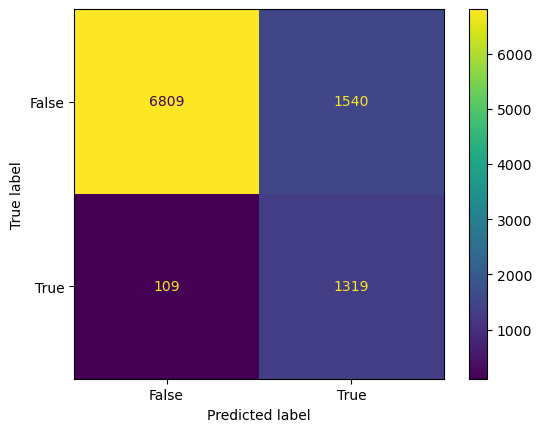

In [74]:
import matplotlib.pyplot as plt

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                           display_labels = [False,True])
cm_display.plot()
plt.show()

In [75]:
metrics.recall_score(ytrain, trainpred)

0.9236694677871149

In [76]:
metrics.precision_score(ytrain, trainpred)

0.4613501224204267

In [77]:
print(metrics.classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      8349
         1.0       0.46      0.92      0.62      1428

    accuracy                           0.83      9777
   macro avg       0.72      0.87      0.75      9777
weighted avg       0.91      0.83      0.85      9777



In [78]:
print(metrics.classification_report(ytest, testpred))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.90      2088
         1.0       0.47      0.92      0.62       357

    accuracy                           0.84      2445
   macro avg       0.73      0.87      0.76      2445
weighted avg       0.91      0.84      0.86      2445



In [79]:
trainprob = model.predict_proba(xtrain) #arr(([0,1], [0,1]...)) 0th value represents false 1st true
trainprob

array([[0.19808888, 0.80191112],
       [0.61295522, 0.38704478],
       [0.83719376, 0.16280624],
       ...,
       [0.9970384 , 0.0029616 ],
       [0.91645527, 0.08354473],
       [0.4818615 , 0.5181385 ]])

In [80]:
trainpred = [0 if i<=0.53 else 1 for i in trainprob[:,0]]
print(metrics.classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       0.55      0.20      0.29      8349
         1.0       0.01      0.07      0.02      1428

    accuracy                           0.18      9777
   macro avg       0.28      0.13      0.16      9777
weighted avg       0.47      0.18      0.25      9777



## Decision Tree Classification

In [81]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4) 
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0., 0., 0., 0., 0.])

In [82]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      8349
         1.0       0.90      0.59      0.72      1428

    accuracy                           0.93      9777
   macro avg       0.92      0.79      0.84      9777
weighted avg       0.93      0.93      0.93      9777



In [83]:
testpred = model.predict(xtest)
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2088
         1.0       0.89      0.59      0.71       357

    accuracy                           0.93      2445
   macro avg       0.91      0.79      0.84      2445
weighted avg       0.93      0.93      0.92      2445



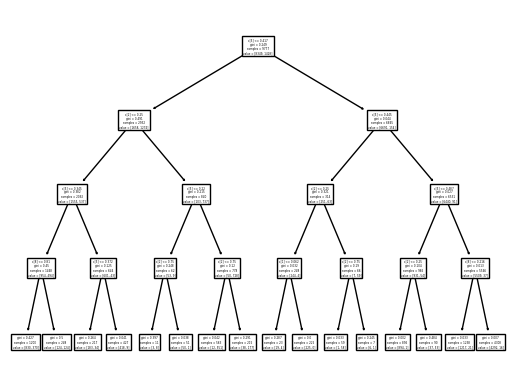

In [84]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model)
plt.show()

## Random Forest Classification

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0., 0., 0., 0., 0.])

In [86]:
model.predict_proba(xtrain)[:5]

array([[0.91, 0.09],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01]])

In [87]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8349
         1.0       1.00      1.00      1.00      1428

    accuracy                           1.00      9777
   macro avg       1.00      1.00      1.00      9777
weighted avg       1.00      1.00      1.00      9777



In [88]:
testpred = model.predict(xtest)
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2088
         1.0       0.88      0.73      0.80       357

    accuracy                           0.95      2445
   macro avg       0.92      0.85      0.88      2445
weighted avg       0.94      0.95      0.94      2445



## Adaboost Classification

In [89]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0., 0., 0., 0., 0.])

In [90]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      8349
         1.0       0.86      0.69      0.77      1428

    accuracy                           0.94      9777
   macro avg       0.91      0.83      0.87      9777
weighted avg       0.94      0.94      0.94      9777



In [91]:
testpred = model.predict(xtest)
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2088
         1.0       0.87      0.66      0.75       357

    accuracy                           0.94      2445
   macro avg       0.91      0.82      0.86      2445
weighted avg       0.93      0.94      0.93      2445



## Gradient Boost Classification

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0., 0., 0., 0., 0.])

In [93]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8349
         1.0       0.91      0.77      0.83      1428

    accuracy                           0.96      9777
   macro avg       0.94      0.88      0.90      9777
weighted avg       0.95      0.96      0.95      9777



In [94]:
testpred = model.predict(xtest)

print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2088
         1.0       0.90      0.72      0.80       357

    accuracy                           0.95      2445
   macro avg       0.92      0.85      0.88      2445
weighted avg       0.95      0.95      0.94      2445



## XGBoost Classification

In [95]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [96]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(xtrain,ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0, 0, 0, 0, 0])

In [97]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8349
         1.0       1.00      0.99      0.99      1428

    accuracy                           1.00      9777
   macro avg       1.00      0.99      1.00      9777
weighted avg       1.00      1.00      1.00      9777



In [98]:
testpred = model.predict(xtest)           
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2088
         1.0       0.86      0.77      0.81       357

    accuracy                           0.95      2445
   macro avg       0.91      0.87      0.89      2445
weighted avg       0.95      0.95      0.95      2445



## Support Vector Classification

In [99]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')    # kernel= poly, linear, rbf, sigmoid
model.fit(xtrain, ytrain)
trainpred = model.predict(xtrain)
trainpred[:5]

array([0., 0., 0., 0., 0.])

In [100]:
from sklearn.metrics import classification_report

print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      8349
         1.0       0.89      0.60      0.72      1428

    accuracy                           0.93      9777
   macro avg       0.91      0.80      0.84      9777
weighted avg       0.93      0.93      0.93      9777



In [101]:
testpred = model.predict(xtest)
print(classification_report(ytest,testpred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      2088
         1.0       0.89      0.57      0.69       357

    accuracy                           0.93      2445
   macro avg       0.91      0.78      0.82      2445
weighted avg       0.92      0.93      0.92      2445



# 2. Use machine learning to create clusters of similar projects.

## K-means and Principal Component Analysis

In [102]:
x = df.drop(columns=['Budget'])

In [103]:
from sklearn.model_selection import train_test_split

xtrain, xtest = train_test_split(x, train_size=0.8,
                                random_state=0)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [105]:
xtrain.shape

(9777, 12)

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
xtrain.shape

(9777, 2)

In [107]:
sum(pca.explained_variance_ratio_)

0.29017203460092833

In [108]:
from sklearn.cluster import KMeans

wcss_list = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss = model.inertia_   #calculating wcss
    wcss_list.append(wcss)
    
wcss_list

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[11396.019095365094,
 9862.043910080889,
 8587.48965676568,
 7852.2945720162425,
 7427.058588807175,
 7111.550039198126,
 6837.999115307767,
 6628.689176454702,
 6445.1254110983955,
 6287.05939845586]

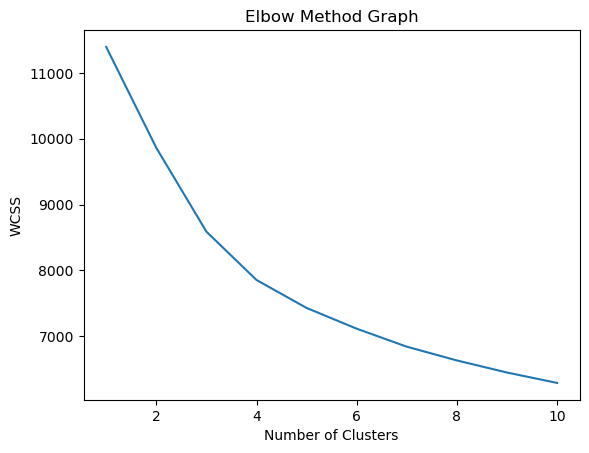

In [109]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
model = KMeans(n_clusters=4)
model.fit(xtrain)
pred = model.predict(xtest)
pred[:5]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 3, 1, 3])

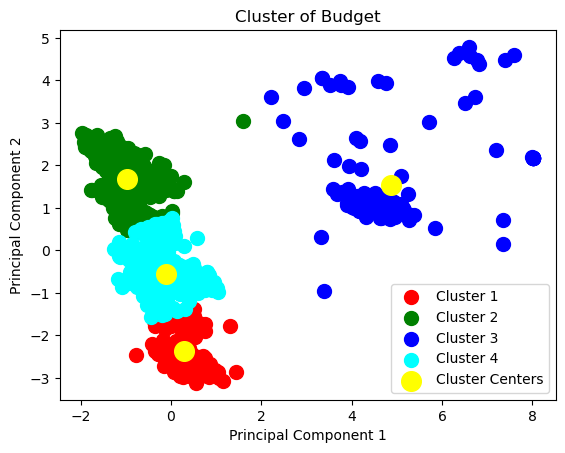

In [111]:
plt.scatter(xtest[pred==0, 0], xtest[pred==0, 1],
           s=100, c='red', label='Cluster 1')
plt.scatter(xtest[pred==1, 0], xtest[pred==1, 1],
           s=100, c='green', label='Cluster 2')
plt.scatter(xtest[pred==2, 0], xtest[pred==2, 1],
           s=100, c='blue', label='Cluster 3')
plt.scatter(xtest[pred==3, 0], xtest[pred==3, 1],
           s=100, c='cyan', label='Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:,1] ,
           s=200, c='yellow', label='Cluster Centers')
plt.title('Cluster of Budget')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()